In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("F:/CUSTOMER_SEGMENTATION/Mall_Customers.csv")

# Show first 5 rows
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(data.columns)


Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [6]:
# Convert 'Genre' to numeric: Male = 0, Female = 1
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

# Check if it's converted
data.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [7]:
# Select features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Show the first few rows
X.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Optional: view the scaled data
print(X_scaled[:5])


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


c:\Users\rishi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rishi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rishi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rishi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

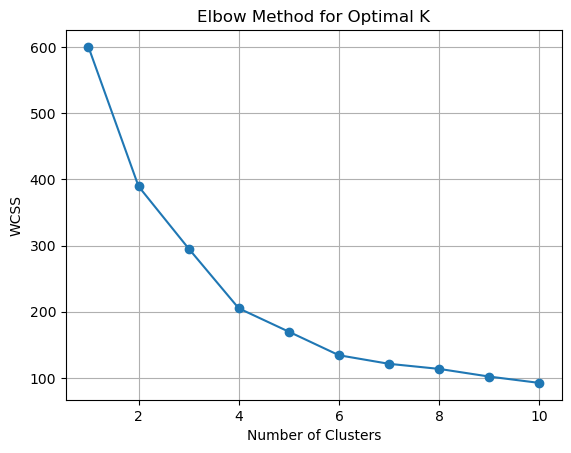

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [10]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = y_kmeans

# Show first few rows with cluster labels
data.head()


c:\Users\rishi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,2


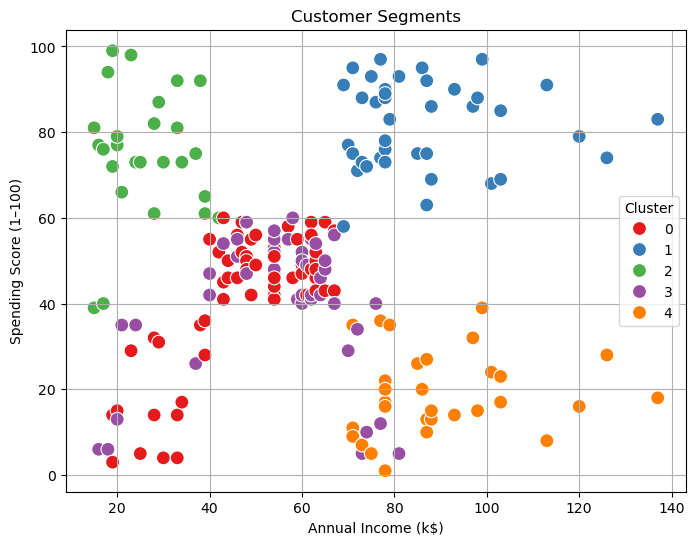

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


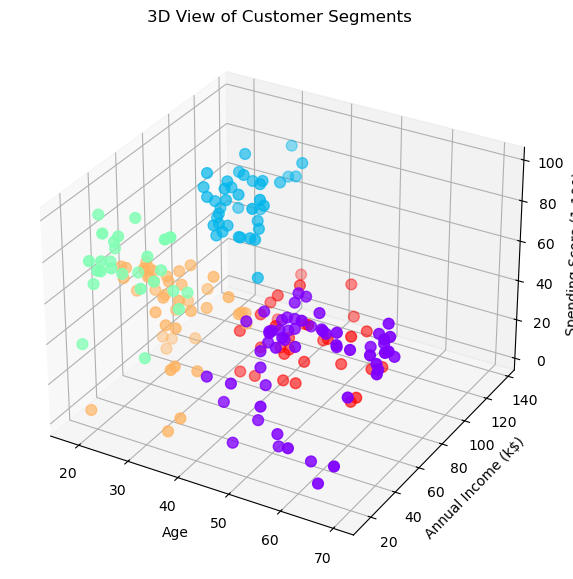

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
sc = ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='rainbow',
    s=60
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D View of Customer Segments")

plt.show()


Ye ek Machine Learning based Customer Segmentation project hai jisme hum mall ke customers ko unke shopping behavior ke basis par group (clusters) karte hain.
Use Case:
Marketing team ko help karta hai:

Kaun log zyada paisa kharch karte hain

Kaun low budget wale hain

Kaun middle segment mein hain

Marketing aur offers ko alag-alag customer group ke hisaab se target kar sakte hain.

🔧 Tune Kya-Kya Use Kiya?
Component	Explanation
Python	Programming language
Pandas	Data loading & cleaning
Scikit-learn	ML models (KMeans, StandardScaler)
Matplotlib/Seaborn	Visualizations (2D and 3D)
KMeans Algorithm	Unsupervised Learning algorithm used to form clusters (groups)
StandardScaler	Scale kiya features ko same range mein laane ke liye
Elbow Method	Decide kiya ki best number of clusters (groups) kitne hone chahiye

🔍 Process Tune Kaise Banaya (Simple Words):
📥 Dataset load kiya (Mall Customers)

🧹 Data clean kiya (Gender ko number mein convert kiya)

🎯 Feature choose kiya: Age, Income, Spending Score

⚖️ Sab features ko scale kiya (taaki clustering sahi ho)

📈 Elbow Method se decide kiya 5 clusters sahi hain

🧠 KMeans algorithm lagaya to group similar customers

📊 Graphs banaye 2D aur 3D mein dekhne ke liye ki kaun kaun se customer kis cluster mein aaye

💬 Jab Koi Puche “Iska Use Kya Hai?” to Tu Bol:
Ye project real-life mein customer segmentation mein use hota hai — jaise Amazon, Flipkart, ya mall wale customer data se samajh paate hain ki:

Kis type ke log zyada spend karte hain

Kis age group ke log low spenders hain

Kise discount ya offer target karna chahiye

Isse business ko targeted marketing karne mein fayda hota hai.

✅ Short Answer Ready for Interview/Viva:
“Maine KMeans clustering algorithm ka use karke mall ke customers ko unke Age, Income aur Spending Score ke basis par 5 clusters mein group kiya. Isse hum marketing strategies ko har segment ke hisaab se target kar sakte hain. Maine Python, Pandas, Sklearn, Matplotlib aur Seaborn use kiya hai — aur Elbow method se best number of clusters decide kiye.”